<AxesSubplot:xlabel='State'>

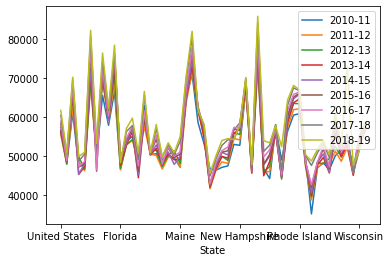

In [2]:
# IDK
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from dataFilePath import *

filePaths = getFilePaths("Unit_3")

dataDict = {}

for file in filePaths:
    dataDict[file] = pd.read_csv(filePaths[file])

# salary data
# salaryData = pd.read_csv(salaryPath)
# salaryData.set_index(salaryData["State"], inplace = True)
# salaryData.drop(columns=["State"], inplace = True)

# salaryData.plot.line()


Corralation: -0.6925365688154659
[ 5.57847469e-28 -9.46433572e-24  6.47141544e-20 -2.18985392e-16
  3.23673950e-13  1.20565488e-10 -1.16037363e-06  1.63816698e-03
 -9.10449164e-01  1.08745674e+02  4.95976390e+04]


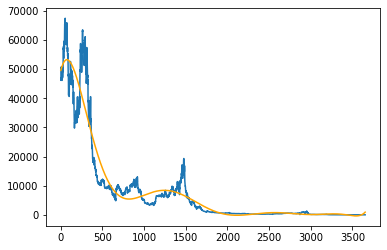

In [15]:
# Price over time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

path = {"coin_BTC": r"c:\Users\7544501\Documents\School-Data-Science\Unit_3\Data\coin_BTC.csv"}

BTCData = pd.read_csv(path["coin_BTC"])
#not setting index to be date so i have ints to use
# BTCData.set_index(BTCData["Date"], inplace = True)
# BTCData.drop(columns=["Date"], inplace = True) 
# BTCData.index = pd.to_datetime(BTCData.index)

BTCData.Date = pd.to_datetime(BTCData.Date)
# BTCData.sort_values("Date", inplace=True) doesnt do anything

x = BTCData.index
y = BTCData.Price
xSeries = pd.Series(x) #corr doesnt like indexSeries so have to make into reg series

# y.corr(xSeries)

print(f"Corralation: {y.corr(xSeries)}")

# plt.scatter(x,y)
plt.plot(x,y)

model = np.polyfit(x,y,10)
predict = np.poly1d(model)

print(model)

xRange = range(x.min(), x.max()+1)
yValues = predict(xRange)

plt.plot(xRange, yValues, color="Orange")

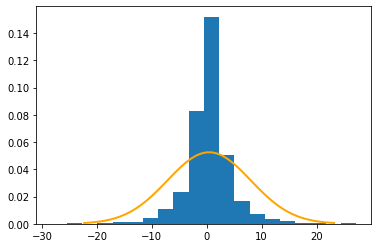

In [10]:
# Histogram
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm

# path = {"coin_BTC": r"c:\Users\7544501\Documents\School-Data-Science\Unit_3\Data\coin_BTC.csv"}

from dataFilePath import *

path = getFilePaths("Unit_3")

BTCData = pd.read_csv(path["coin_BTC"])
BTCData.set_index(BTCData["Date"], inplace = True)
BTCData.drop(columns=["Date"], inplace = True)
BTCData.index = pd.to_datetime(BTCData.index)

BTCData["Volume"] = BTCData["Vol."]
VolColumnNumber = 6
for i in range(len(BTCData["Vol."])):
    BTCData.iloc[i, -1:] = int(float(BTCData.iloc[i, VolColumnNumber][:-1]) * 1000)

# print(BTCData)

# plt.hist(BTCData.loc[BTCData["Change %"] != 336.84, "Change %"], bins=10, density=True)

# plt.hist(BTCData["Change %"], bins=20, density=True)

# BTCData[(np.abs(stats.zscore(BTCData["Change %"])) < 3)] remove outliers

# plt.hist(BTCData[(np.abs(stats.zscore(BTCData["Change %"])) < 3)]["Change %"], bins=20, density=True)

plt.hist(BTCData[(np.abs(stats.zscore(BTCData["Change %"])) < 4)]["Change %"], bins=20, density=True)

mean = BTCData["Change %"].mean()
median = BTCData["Change %"].median()
std = BTCData["Change %"].std()

xmin = mean - 3 * std
xmax = mean + 3 * std

x = np.linspace(xmin, xmax)
y = norm.pdf(x, mean, std)

plt.plot(x, y, color="orange", linewidth=2) 

# plt.hist(BTCData.drop(index=[pd.to_datetime("2014-02-26"), pd.to_datetime("2014-02-22")])["Change %"], bins=10, density=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x208f4471670>,
 'caps': [<matplotlib.lines.Line2D at 0x208f4471c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x208f44713a0>],
 'medians': [<matplotlib.lines.Line2D at 0x208f44651f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x208f44654c0>],
 'means': []}

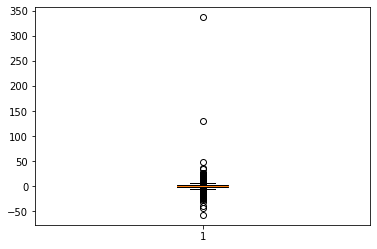

In [11]:
# Boxplot
# %load notebookImport
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm

from dataFilePath import *

path = getFilePaths("Unit_3")

BTCData = pd.read_csv(path["coin_BTC"])
BTCData.set_index(BTCData["Date"], inplace = True)
BTCData.drop(columns=["Date"], inplace = True)
BTCData.index = pd.to_datetime(BTCData.index)

# plt.boxplot(BTCData[(np.abs(stats.zscore(BTCData["Change %"])) < 3)]["Change %"])
plt.boxplot(BTCData["Change %"])

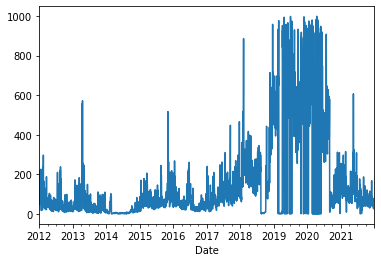

In [7]:
# Volume over time
# %load notebookImport
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm

from dataFilePath import *

path = getFilePaths("Unit_3")

BTCData = pd.read_csv(path["coin_BTC"])
BTCData.set_index(BTCData["Date"], inplace = True)
BTCData.drop(columns=["Date"], inplace = True)
BTCData.index = pd.to_datetime(BTCData.index)

BTCData["Volume"] = BTCData["Vol."]
VolColumnNumber = 6
for i in range(len(BTCData["Vol."])):
    BTCData.iloc[i, -1:] = int(float(BTCData.iloc[i, VolColumnNumber][:-1]))

BTCData.loc[:, "Volume"].plot.line()

x = BTCData.index
y = BTCData["Volume"]

# plt.scatter(x,y)

Line of best fit: y = -0.0007775173644912985x + 0.4439740350743566
Corralation: -0.03701674939831113


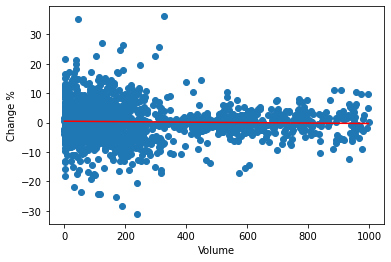

In [28]:
# Volume vs Change %
# %load notebookImport
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm

from dataFilePath import *

path = getFilePaths("Unit_3")

BTCData = pd.read_csv(path["coin_BTC"])
BTCData.set_index(BTCData["Date"], inplace = True)
BTCData.drop(columns=["Date"], inplace = True)
BTCData.index = pd.to_datetime(BTCData.index)


BTCData["Volume"] = BTCData["Vol."]
BTCData["VolumeK"] = BTCData["Vol."]
VolColumnNumber = 6
for i in range(len(BTCData["Vol."])):
    BTCData.iloc[i, -2:-1] = float(BTCData.iloc[i, VolColumnNumber][:-1]) * 1000
    BTCData.iloc[i, -1:] = float(BTCData.iloc[i, VolColumnNumber+1][:-1])
BTCData["Volume"] = BTCData["Volume"].astype("int")
BTCData["VolumeK"] = BTCData["VolumeK"].astype("int")


# [1000 for i in range(len(BTCData["Vol."]))]

plt.xlabel("Volume")
plt.ylabel("Change %")


x = BTCData[(np.abs(stats.zscore(BTCData["Change %"])) < 5)]["VolumeK"]
y = BTCData[(np.abs(stats.zscore(BTCData["Change %"])) < 5)]["Change %"]

# print(BTCData.dtypes)

plt.scatter(x,y)

model = np.polyfit(x,y,1)
predict = np.poly1d(model)

xRange = range(x.min(), x.max())
yValues = predict(xRange)

plt.plot(xRange,yValues, color="red")

print(f"Line of best fit: y = {model[0]}x + {model[1]}")
print(f"Corralation: {y.corr(x)}")
